In [4]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import numpy as np
import h5py
import random
import seaborn
import pandas as pd

In [5]:
N_dataset_dir = ('/Users/xiaoshuaiheng/Desktop/CPE 695 AppliedML/final project/chest_xray/data/NORMAL')
P_dataset_dir = ('/Users/xiaoshuaiheng/Desktop/CPE 695 AppliedML/final project/chest_xray/data/PNEUMONIA')
N_imageList = os.listdir(N_dataset_dir)
P_imageList = os.listdir(P_dataset_dir)

In [15]:
print('"Normal" class has %d images' %len(N_imageList))
print('"Pneumonia" class has %d images' %len(P_imageList))

"Normal" class has 1583 images
"Pneumonia" class has 4273 images


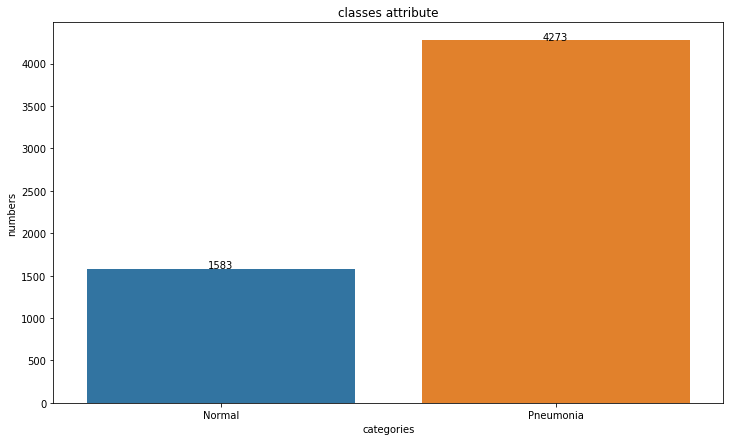

In [30]:
counter = [len(N_imageList), len(P_imageList)]
df_counter = pd.DataFrame()
df_counter['categories'] = ['Normal', 'Pneumonia']
df_counter['numbers'] = counter
plt.figure(figsize = (12,7))
seaborn.barplot(x = 'categories', y = 'numbers', data = df_counter)
for index,value in enumerate(counter):
    plt.text(x = index, y = value, s = value, color = 'black', ha = 'center')
plt.title('classes attribute')
plt.show()

In [ ]:
# data augmentation and creating dataset

In [24]:
def data_augment(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_hue(image, 0.01)
    image = tf.image.random_saturation(image, 0.7, 1.3)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    #image = tf.image.random_brightness(image, 0.1)
    return image 

In [25]:
dataset = []
dim_size = 224
def creat_dataset(dataset_dir, imageList, label, augmentation = False, aug_times = 1):
    counter = 0
    for name in tqdm(imageList):
        image_path = os.path.join(dataset_dir, name)
        try:
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            image = cv2.resize(image,(dim_size, dim_size))
            dataset.append([np.array(image), np.array(label)])
            counter += 1
            if augmentation:
                for _ in range(aug_times):
                    new_image = data_augment(image)
                    dataset.append([np.array(new_image), np.array(label)])
                    counter += 1
        except:
            continue
    random.shuffle(dataset)
    return dataset, counter

In [26]:
aug_counter = [0,0]
dataset, aug_counter[0] = creat_dataset(N_dataset_dir, N_imageList, 0, augmentation = True, aug_times = 2)
dataset, aug_counter[1] = creat_dataset(P_dataset_dir, P_imageList, 1, augmentation = False, aug_times = 2)

100%|██████████| 4273/4273 [00:37<00:00, 114.95it/s]


In [27]:
len(dataset)

9022

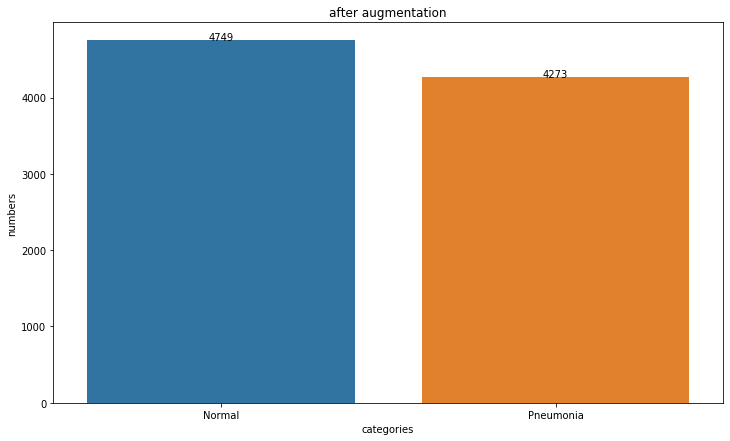

In [29]:
df_aug_counter = pd.DataFrame()
df_aug_counter['categories'] = ['Normal', 'Pneumonia']
df_aug_counter['numbers'] = aug_counter
plt.figure(figsize = (12,7))
seaborn.barplot(x = 'categories', y = 'numbers', data = df_aug_counter)
for index,value in enumerate(aug_counter):
    plt.text(x = index, y = value, s = value, color = 'black', ha = 'center')
plt.title('After Augmentation')
plt.show()

In [ ]:
#randomly plotting some instances

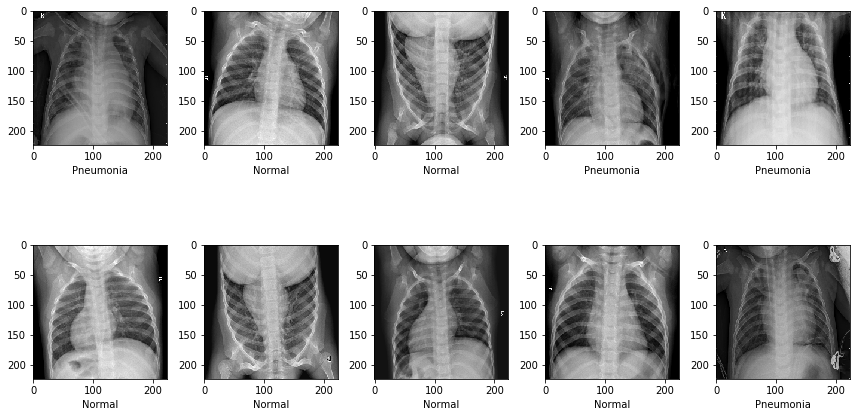

In [31]:
plt.figure(figsize = (12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image, category = dataset[sample][0], dataset[sample][1]
    if category == 0:
        label = 'Normal'
    else:
        label = 'Pneumonia'
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout()

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x = np.array([i[0] for i in dataset]).reshape(-1, 224, 224, 3)
y = np.array([i[1] for i in dataset])
x_train_val, x_test, y_train_val, y_test = train_test_split(x,y,test_size = 0.1)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 0.2)

In [34]:
f = h5py.File('/Users/xiaoshuaiheng/Desktop/CPE 695 AppliedML/final project/dataset.hdf5',mode = 'w')

In [35]:
f.create_dataset(name = 'x_train',shape = (len(x_train),224,224,3), dtype = 'i', data = x_train)
f.create_dataset(name = 'y_train',shape = (len(y_train),), dtype = 'i', data = y_train)
f.create_dataset(name = 'x_val',shape = (len(x_val),224,224,3), dtype = 'i', data = x_val)
f.create_dataset(name = 'y_val',shape = (len(y_val),), dtype = 'i', data = y_val)
f.create_dataset(name = 'x_test',shape = (len(x_test),224,224,3), dtype = 'i', data = x_test)
f.create_dataset(name = 'y_test',shape = (len(y_test),), dtype = 'i', data = y_test)

<HDF5 dataset "y_test": shape (903,), type "<i4">

In [36]:
f.close()